

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a project using TMDb dataset from kaggle. The original dataset is csv file contains about 10000 movies record with detailed info. All the variables are served as 3 parts:
   >1 The basic movie info: including id, movie name, major cast, director, genres, production_companies, overview, keywords and release date and year, etc.
   
   >2 The movie review related info: including imdb_id, vote count, vote average, popularity, etc.
   
   >3 The revenue related info: including budget, revenue 
   
   >4 Other info: such as homepage, tagline, keyword, etc.

The dataset will be gathered, cleaned, restored and analyzed for result. In this project, we are most interested in what variables will be highly impact on movie revenue and how these variables impact the revenue from overall view and answer the following questions:
    
   - What is the relationship between movie's popularity and revenue?
   - What is the relationship between movie's budget and revenue?
   - Which director/cast will be more likely to have high revenue movie?
   - Which genres is considered "best" for movie revenue? And which genres are considered "worst" for movie revenue?


In [1]:
# Import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')


In [3]:
# Brief look at the data
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

- Some of the variables are not available for analysis based on our current knowledge, such as "tagline", "overview", "keyword". These will be revisit once we know the text mining knowledge.
- In this section we don't analysis datetime and year's relationship with movie revenue, will drop the columns later.
- We can see several columns such as "cast","genres","production_companies" contain mutiple categorical variables and seperated by "|". We might need to modify these columns later for better data structure. And several columns such as "budget_adj" and "revenue_adj" have scitific record of numbers, also will consider to be removed later

In [4]:
# Look at the data shape and data type
df.shape

(10866, 21)

The dataset contains 10866 rows with 21 columns.

In [5]:
# Briefly see all the summary statistics of numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here we can see:
- "popularity" column mean is 0.64, median is 0.38 but max is 32.98. 
- From "budget" column, we can see more than half of the movies have zero budget
- Similarly, more than have of the movies have zero revenue
- In the runtime column, we can see majority movies time range is between 90 - 111 mins. But there are also some movies has close to 15 hours.
- From the "vote_count" and "vote_average" column, we can see the vote is not all equal to all movies. 
- From "release_year" column, we can see this dataset contains movies from year 1960 to 2015


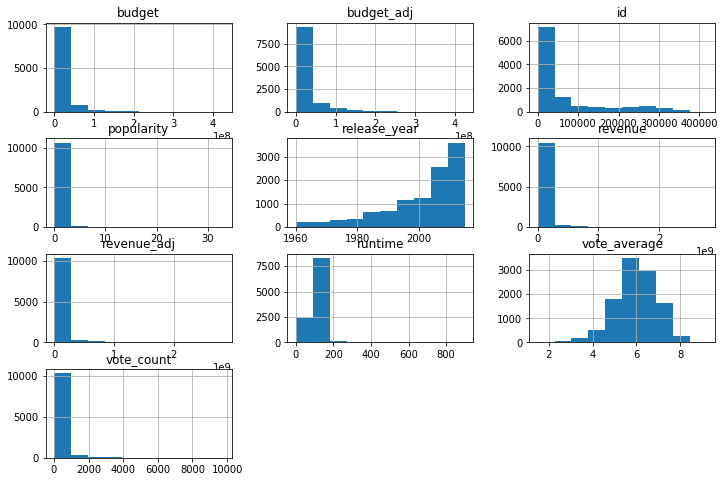

In [6]:
# Hist plot of the numeric variables
df.hist(figsize = (12,8))
plt.show()

From here we can see, "budget","popularity","revenue" and "vote_count" are all right-skewed. A lot movies with zero revenue also has zero budget and small vote. We might consider seperate zero revenue rows and non-zero revenue rows into two split data later to see if budget has very high impact on the revenue.

In [7]:
# Further Check the data with both budget zero and revenue zero
df.query('revenue == 0 and budget ==0').describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4701.000000,4701.000000,4701.0,4701.0,4701.000000,4701.000000,4701.000000,4701.000000,4701.0,4701.0
mean,89371.031270,0.301634,0.0,0.0,96.325888,35.742608,5.890896,2001.764518,0.0,0.0
std,105759.613694,0.289725,0.0,0.0,38.925933,53.049861,1.005247,13.889720,0.0,0.0
min,17.000000,0.000065,0.0,0.0,0.000000,10.000000,1.500000,1960.000000,0.0,0.0
25%,15322.000000,0.136857,0.0,0.0,87.000000,13.000000,5.300000,1996.000000,0.0,0.0
50%,32678.000000,0.245390,0.0,0.0,94.000000,19.000000,5.900000,2007.000000,0.0,0.0
75%,135531.000000,0.391055,0.0,0.0,105.000000,36.000000,6.600000,2012.000000,0.0,0.0
max,409696.000000,8.411577,0.0,0.0,900.000000,1074.000000,9.200000,2015.000000,0.0,0.0


From here we can see, totally 4701 records has zero budget and zero revenue.

In [8]:
# See data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It seems all the column names are lowercase, we don't need to make changes with the column name. But some of the columns have missing value, and some columns are not highly relevant with the revenue question, so we may drop some columns and remove rows with missing value later.

In [9]:
# Check record duplication
df.duplicated().sum()

1

See one duplication, just drop it.

In [10]:
# Drop duplicates
df.drop_duplicates(keep = 'first',inplace = True)

In [11]:
# Check again for duplicates
df.duplicated().sum()

0

In [12]:
# Check if there's any missing value in the data
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There's a lot missing value in column "homepage", "tagline" and "keywords", we might drop these columns in data clean section. The columns "production_companies" also has a lot missing values, But it might due to some human type-in missing or some individual produced movies has no companies, or some old movie didn't have this columns, we need to further identify if this column need to be removed or modify missing value with some other meaningful value.

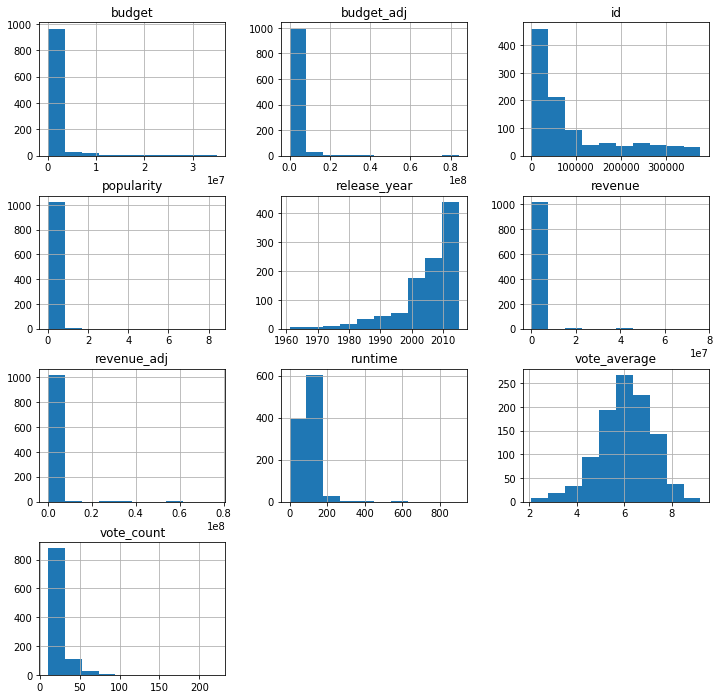

In [13]:
# Check if missing value is correlated with some other variables
df[df.production_companies.isnull()].hist(figsize = (12,12))
plt.show()

In this histogram plot, we can see majority unknown production company movies also has very low budget, low popularity, barely no revenue and very small rountime and vote_count. And as time goes, more and more come to release. So we might guess these movies belongs to indivudual movie makers or small studios. In order to still keep data without remove all the missing value, we will replace all the missing value with "Unknown Maker".

In [14]:
# Check the number of unique value in each columns
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning (Drop irrelevant columns and clean missing value)

In this section, we will first drop columns that are not related to our analysis: "imdb_id","homepage","tagline","keywords","overview","release_year","release_date","budget_adj","revenue_adj"

In [15]:
# Drop columns that not fully relevant with revenue and columns contains a lot missing value.
df.drop(columns = ['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj','release_year'], inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3


In [16]:
# As mentioned before, replace missing value in production_companies with "Unknown Maker"
df['production_companies'].fillna('Unknown Maker',inplace = True)

In [17]:
# Re-check if all the missing value is filled
df['production_companies'].isnull().sum()

0

In [18]:
# Repeat similar process, replace missing value in "cast" columns with "Unknown Cast"
df['cast'].fillna('Unknown Cast', inplace = True)
#replace missing value in "director" with "Unknown Director"
df['director'].fillna('Unknown Director',inplace = True)

In [19]:
# Re-check if all the missing value is filled
df.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
runtime                  0
genres                  23
production_companies     0
release_date             0
vote_count               0
vote_average             0
dtype: int64

There are still 23 missing values in genres columns. Considering we might analysis genres type with the revenue and we can't replace missing value with anyother value. Will remove rows with missing value.

In [20]:
# Remove all the missing rows in genres.
df.dropna(inplace = True)

In [21]:
# Recheck the shape of dataset
df.shape

(10842, 13)

Before EDA section, we need to transform some columns contain "|" where represents multiple values in the dataset. Before split, we will only keep only one directors in the director columns.

In [22]:
df = df.drop('director',axis = 1).join(df['director'].str.split('|',expand = True).stack().reset_index(level=1,drop = True).rename('director'))

As we metioned before, after clean all the missing value, we want to split data to two seperate dataset, one contains movie with non-zero revenue, another contains movie only with zero revenue.

In [23]:
#Split dataset to df_0 and df_1, represents for dataset with zero revenue and dataset with revenue.
df_0 = df.query('revenue == 0')
df_0.shape

(6602, 13)

In [24]:
df_1 = df.query('revenue != 0')
df_1.shape

(5295, 13)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Whichnumeric variables have the most obvious impact on the movie revenue)

We first look at df_0 dataset( revenue is zero)

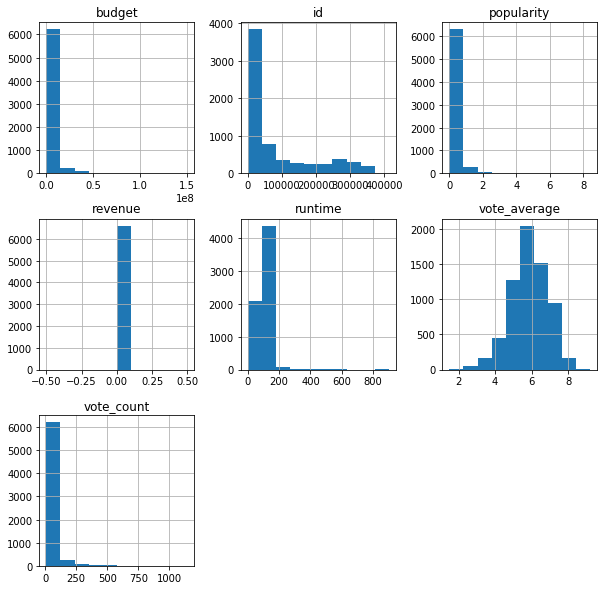

In [25]:
# Numeric variables histgram with df_0 dataset
df_0.hist(figsize = (10,10))
plt.show()

From the histogram above, we can see with zero revenue, a lot movies also have zero budget and zero popularity. The total vote counts is also zero. 

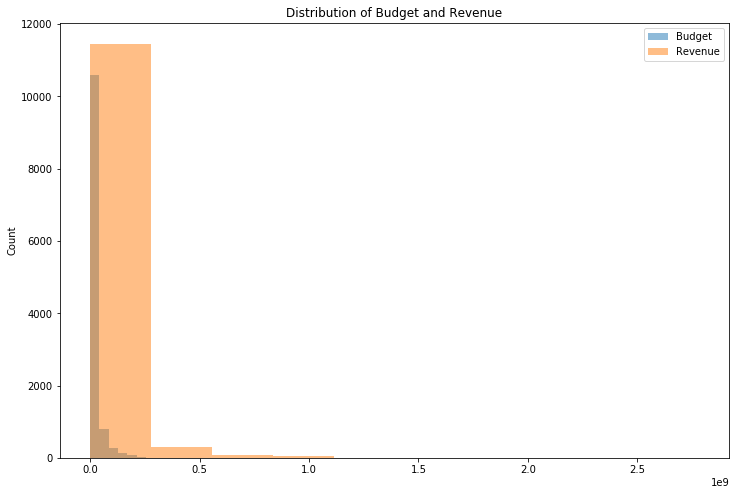

In [26]:
#Histgram of budget distribution
plt.figure(figsize = (12,8))
plt.ylabel('Count')
plt.hist(df.budget,alpha = .5, label = 'Budget')
plt.hist(df.revenue,alpha = .5, label = 'Revenue')
plt.title('Distribution of Budget and Revenue')
plt.legend();

As we can see both budget and revenue distribution are right-skewed. In general "revenue" distrubtion covers "budget".


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


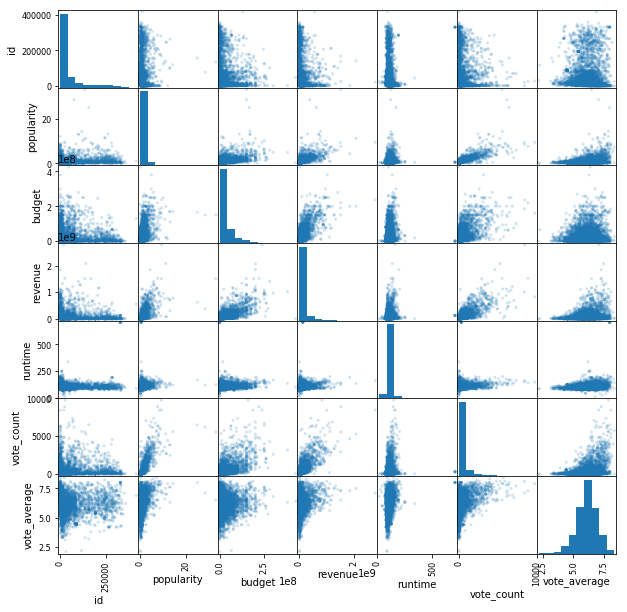

In [27]:
# Numeric variables histgram with df_1 dataset
pd.scatter_matrix(df_1,alpha = 0.2, figsize = (10,10))
plt.show()


From the scatter matrix we can see the columns "budget","vote_count" and "popularity" have strong positive correlation with variable "revenue"

In [28]:
#Print out correlation coefficient matrix for all the numeric variables in df_1
corr = df_1[['popularity','budget','revenue','runtime','vote_count','vote_average']].corr()
corr

,popularity,budget,revenue,runtime,vote_count,vote_average
popularity,1.000000,0.487379,0.631381,0.117642,0.791624,0.293310
budget,0.487379,1.000000,0.706453,0.133949,0.588167,0.061282
revenue,0.631381,0.706453,1.000000,0.145561,0.766684,0.222363
runtime,0.117642,0.133949,0.145561,1.000000,0.154036,0.248662
vote_count,0.791624,0.588167,0.766684,0.154036,1.000000,0.354187
vote_average,0.293310,0.061282,0.222363,0.248662,0.354187,1.000000


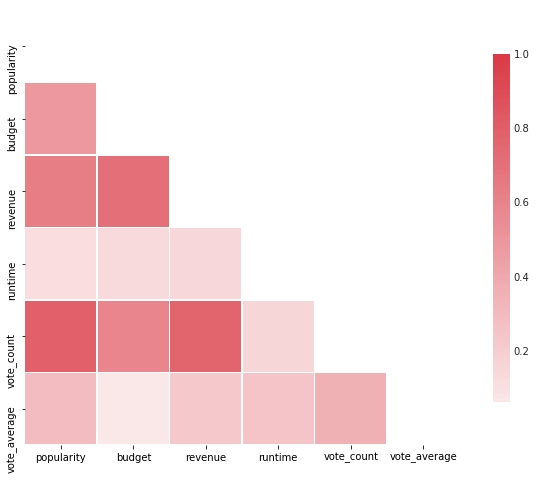

In [29]:
# This is taken from 
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Draw a heatmap for the correlation matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set_style('darkgrid')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8});

Further from the above correlation matrix and the heatmap we can prove the idea, the "vote_count", "budget" and "popularity" has top 3 highest positive correlation with "revenue". Considering "popularity" also has high correlation with "vote_count". We can conclude the "budget", "vote_count" and "popularity" will be the top 3 factors impact on the movies' revenue.

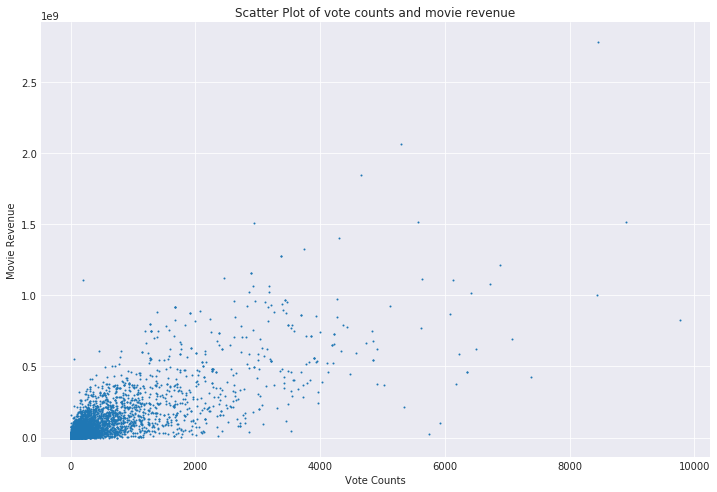

In [30]:
# Scatter plot of vote_counts and revenue
plt.figure(figsize=(12, 8))
plt.xlabel('Vote Counts')
plt.ylabel('Movie Revenue')
plt.plot(df_1.vote_count, 
    df_1.revenue, linestyle='', 
     marker='o', markersize=1)
plt.title('Scatter Plot of vote counts and movie revenue');

From the scatter plot, we can see vote counts are movie revenue shows some positive correlations.But all the data are clustered toward zero. 
In order to better understand the correlation for these clustered data. We will create a new dataset called log10, contains log10 transfer for the variable: "revenue","budget","popularity" and "vote_counts"

In [31]:
#Create new dataset contains log10 transfer of "budget","revenue","popularity" and "vote_count"
log10 = df.copy()
log10 = log10[['budget', 'revenue', 'popularity', 'vote_count']]
log10['budget'] = df.budget.apply(lambda x: np.log10(x))
log10['revenue'] = df.revenue.apply(lambda x: np.log10(x))
log10['popularity'] = df.popularity.apply(lambda x: np.log10(x))
log10['vote_count'] = df.vote_count.apply(lambda x: np.log10(x))

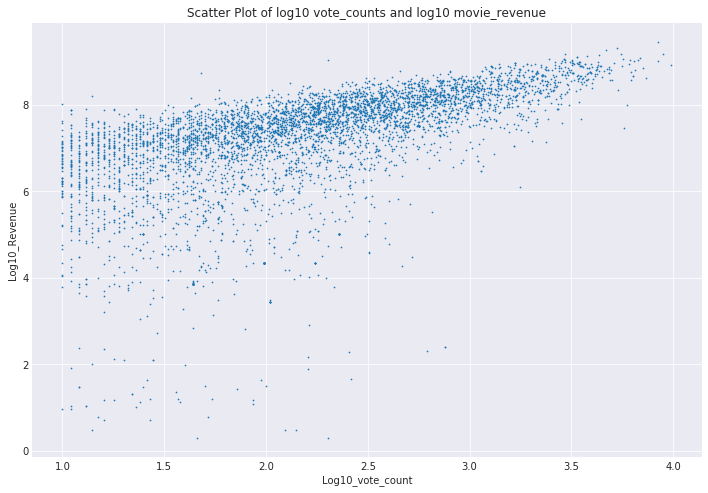

In [32]:
# Log10 scatter plot of vote counts and movie revenue
plt.figure(figsize=(12, 8))
plt.xlabel('Log10_vote_count')
plt.ylabel('Log10_Revenue')
plt.plot(log10.vote_count, log10.revenue, 
           linestyle='', marker='o', markersize=0.7)
plt.title('Scatter Plot of log10 vote_counts and log10 movie_revenue');

We can see in general, movie revenue has positive relationship with vote counts. However, we can see few scattered plots indicated some high vote_counts movie has very low revenue.

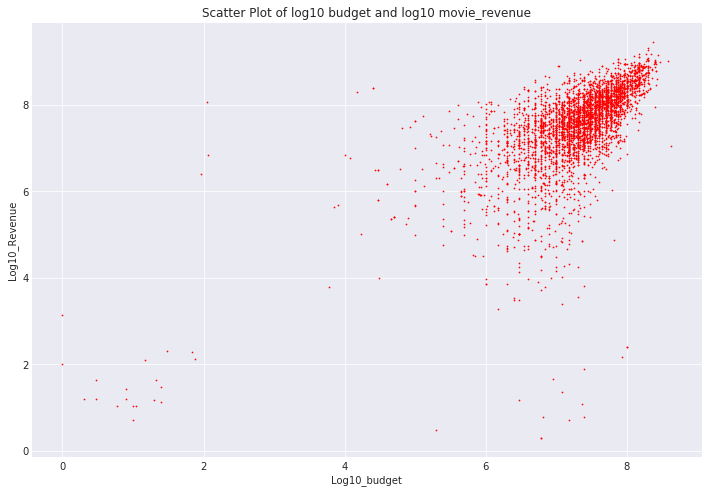

In [33]:
#Similar, do Log 10 scatter plot of budget and movie revenue
plt.figure(figsize=(12, 8))
plt.xlabel('Log10_budget')
plt.ylabel('Log10_Revenue')
plt.plot(log10.budget, log10.revenue, 
           linestyle='', marker='o', markersize=0.7,color = 'red')
plt.title('Scatter Plot of log10 budget and log10 movie_revenue');

In general, we can see movie budget has positive relationship with movie revenue. However, when we look at the right bottom side, there are several movies have high budget but get low revenue.

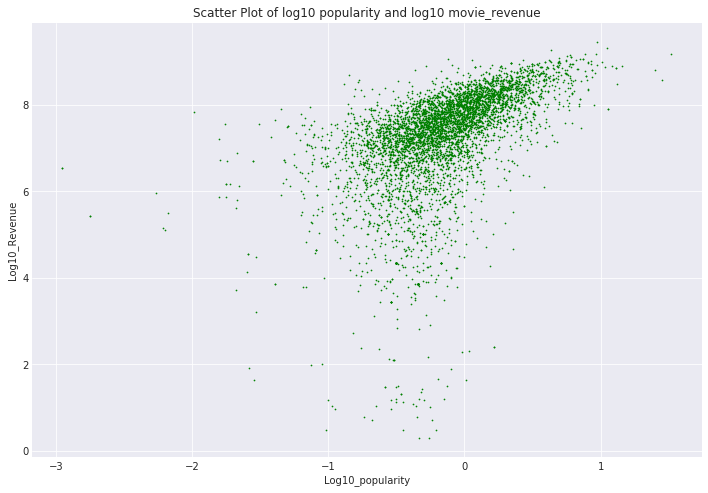

In [34]:
#Similar, do Log 10 scatter plot of popularity and movie revenue
plt.figure(figsize=(12, 8))
plt.xlabel('Log10_popularity')
plt.ylabel('Log10_Revenue')
plt.plot(log10.popularity, log10.revenue, 
           linestyle='', marker='o', markersize=0.7,color = 'green')
plt.title('Scatter Plot of log10 popularity and log10 movie_revenue');

**In conclusion, from both df_0 and df_1 dataset, we can get same conclusion, the "budget", "popularity"and "vote_count" would be the most important thres numeric factors impact on movies' revenue. Movie revenue has positive relationship with vote counts, budget and popularity.**


### Research Question 2  (Which diretor, cast and genres would lead to movies has higher revenue )

In [35]:
# First, lets findout which director bring up highest total revenue on movies
df_director_sum = df.groupby('director')['revenue'].sum().reset_index()
df_director_sum = df_director_sum[['director','revenue']]

df_director_sum = df_director_sum.sort_values('revenue',ascending = False)[0:10]
df_director_sum

,director,revenue
4839,Steven Spielberg,9048014691
3997,Peter Jackson,6523244659
2116,James Cameron,5841894863
3457,Michael Bay,4917208171
902,Christopher Nolan,4167548502
1271,David Yates,4154295625
4356,Robert Zemeckis,3869690869
817,Chris Columbus,3851491668
4962,Tim Burton,3782609685
4247,Ridley Scott,3649996480


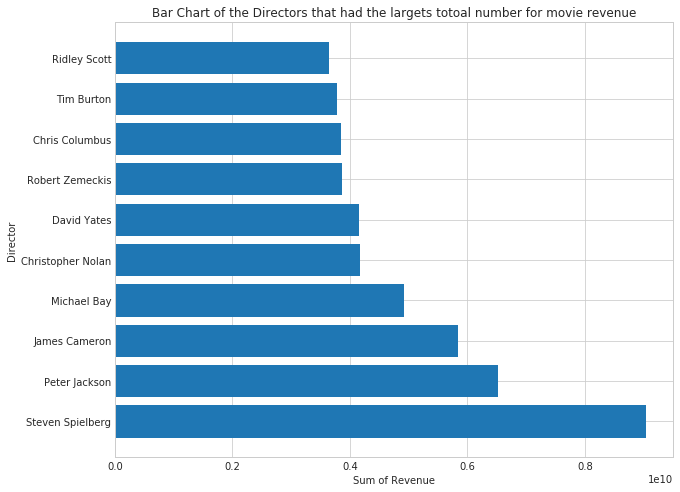

In [36]:
#plot ranking of director with total_movie_revenue
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))

plt.barh(range(len(df_director_sum.director)),df_director_sum.revenue)
plt.yticks(range(len(df_director_sum.director)),df_director_sum.director)
plt.xlabel('Sum of Revenue')
plt.ylabel('Director')
plt.title('Bar Chart of the Directors that had the largets totoal number for movie revenue')
plt.show();

We can find out top 3 total revenue movies directors are Steven Spielberg, Peter Jackson and James Cameron. 

In [37]:
# Then we compare average revenue each director bring up for the movie.
df_director_avg = df.groupby('director')['revenue'].mean().reset_index()
df_director_avg = df_director_avg[['director','revenue']]

df_director_avg = df_director_avg.sort_values('revenue',ascending = False)[0:10]
df_director_avg

,director,revenue
4076,Pierre Coffin,8.903356e+08
1271,David Yates,8.308591e+08
958,Colin Trevorrow,7.587683e+08
4349,Robert Stromberg,7.584104e+08
3078,Lee Unkrich,7.439073e+08
544,Bob Peterson,7.313427e+08
2060,J.J. Abrams,7.158340e+08
963,Conrad Vernon,6.827566e+08
835,Chris Miller,6.769728e+08
2340,Jennifer Yuh,6.656923e+08


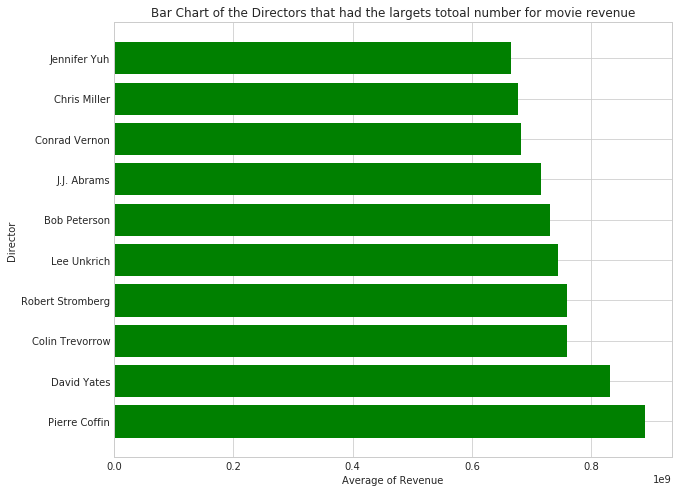

In [38]:
#plot ranking of director with average_movie_revenue
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))

plt.barh(range(len(df_director_avg.director)),df_director_avg.revenue,color = 'green')
plt.yticks(range(len(df_director_avg.director)),df_director_avg.director)
plt.xlabel('Average of Revenue')
plt.ylabel('Director')
plt.title('Bar Chart of the Directors that had the largets totoal number for movie revenue')
plt.show();

**On average, we can see top 3 directors bring up highest average movies revenue are Pierre Coffin, David Yates and Colin Trevorrow. Additionally, compared with two result list, we can see David Yates is on both list. Therefore, we can conclude a great director do have huge impact on the movie revenue. But directors has highest total revenue of movies doesn't guarantee averagely high revenue for movies**

Then we need to take a look at see which actor/actress in the movies with highest revenue. 

Before we do the EDA, we will transfer the dataset, split cast columns and create new rows for each individual cast.

In [39]:
#import itrate tool package
from itertools import chain

In [40]:
# return list from series of "|" separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

In [41]:
# calculate length of splits
lens = df['cast'].str.split('|').map(len)

# create new dataframe, repeating or chaining as appropriate
df_cast = pd.DataFrame({'cast':chainer(df['cast']),
                 'revenue':np.repeat(df['revenue'],lens),
                        'original_title':np.repeat(df['original_title'],lens)})

In [42]:
#check df_cast data and compared with original dataset
df.head(1)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,director
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,Colin Trevorrow


In [43]:
df_cast.head(5)

,cast,revenue,original_title
0,Chris Pratt,1513528810,Jurassic World
0,Bryce Dallas Howard,1513528810,Jurassic World
0,Irrfan Khan,1513528810,Jurassic World
0,Vincent D'Onofrio,1513528810,Jurassic World
0,Nick Robinson,1513528810,Jurassic World


We can see after data modified, first 5 rows are all the cast for movie Jurassic World, and the revenue of the movie is same.

In [44]:
#Check the shape of df_cast dataset
df_cast.shape

(57513, 3)

In [45]:
#Lets findout which actor/actress bring up highest total revenue on movies
df_cast.groupby('cast')['revenue'].sum().sort_values(ascending = False).head(10)

cast
Cameron Diaz        10491168565
Tom Hanks            9649138706
Eddie Murphy         9542051601
Ben Stiller          9368109863
Harrison Ford        8922840695
Tom Cruise           8812436186
Emma Watson          8227793843
Ian McKellen         8179505359
Johnny Depp          8171274441
Daniel Radcliffe     7863036755
Name: revenue, dtype: int64

In [46]:
#Lets findout which actor/actress bring up highest total revenue on movies
df_cast.groupby('cast')['revenue'].mean().sort_values(ascending = False).head(10)

cast
Daisy Ridley          2.068178e+09
Santino Fontana       1.274219e+09
Bob Peck              9.201000e+08
Robert MacNaughton    7.929106e+08
Rosemary Harris       7.837663e+08
Richard Armitage      7.727814e+08
Isobelle Molloy       7.584104e+08
Helmut Bakaitis       7.385997e+08
Phaldut Sharma        7.163927e+08
Rebecca Ferguson      6.823301e+08
Name: revenue, dtype: float64

**The movies with Cameron Diaz, Tom Hanks and Eddie Murphy on total have top 3 highest revenue. However, on average, the movies with Daisy Ridley, Santino Fontana and Bob Peck are the movies top 3 average high revenue. There's no actor/actress in both top 10 lists. Therefore we can conclude actor/actress is not a huge impact on the movie's revenue.**

Next, we want to check which genres will have highest movie revenue. Similary with previous analysis, we need to transfrom dataframe to split genres column, repeat each category to a new rows.

In [47]:
# calculate length of splits
lens = df['genres'].str.split('|').map(len)

# create new dataframe df_genres, repeating or chaining as appropriate
df_genres = pd.DataFrame({'genres':chainer(df['genres']),
                 'revenue':np.repeat(df['revenue'],lens),
                        'original_title':np.repeat(df['original_title'],lens)})

In [48]:
#Check the head of df_genres dataset
df_genres.head(5)

,genres,revenue,original_title
0,Action,1513528810,Jurassic World
0,Adventure,1513528810,Jurassic World
0,Science Fiction,1513528810,Jurassic World
0,Thriller,1513528810,Jurassic World
1,Action,378436354,Mad Max: Fury Road


The Jurassic World is sucessfuly split to 4 rows with each repeat for same revenue and belongs to different movie categories.

In [49]:
#Check which genres bring up highest total revenue for movies.
df_genres_sum = df_genres.groupby('genres')['revenue'].sum().reset_index()
df_genres_sum = df_genres_sum[['genres','revenue']]

df_genres_sum = df_genres_sum.sort_values('revenue',ascending = False)
df_genres_sum

,genres,revenue
1,Adventure,188222218270
0,Action,183703368949
3,Comedy,167269308333
6,Drama,144860330925
17,Thriller,124666737729
7,Family,122392232711
8,Fantasy,98555059129
15,Science Fiction,91153782683
2,Animation,86701906446
14,Romance,64220169896


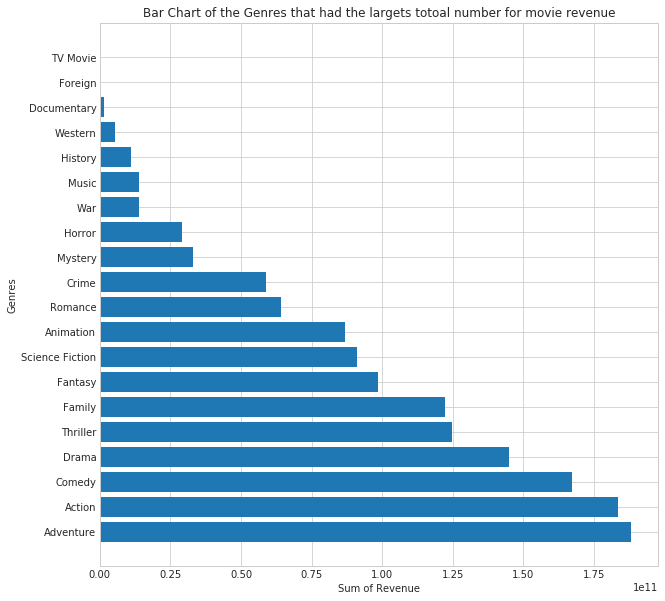

In [50]:
#plot ranking of director with average_movie_revenue
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))

plt.barh(range(len(df_genres_sum.genres)),df_genres_sum.revenue)
plt.yticks(range(len(df_genres_sum.genres)),df_genres_sum.genres)
plt.xlabel('Sum of Revenue')
plt.ylabel('Genres')
plt.title('Bar Chart of the Genres that had the largets totoal number for movie revenue')
plt.show();

In [51]:
#Check which genres bring up averagly highest total revenue for movies.
df_genres_avg = df_genres.groupby('genres')['revenue'].mean().reset_index()
df_genres_avg = df_genres_avg[['genres','revenue']]

df_genres_avg = df_genres_avg.sort_values('revenue',ascending = False)
df_genres_avg



,genres,revenue
1,Adventure,1.142819e+08
8,Fantasy,9.568452e+07
2,Animation,8.722526e+07
7,Family,8.297778e+07
0,Action,7.114770e+07
15,Science Fiction,6.707416e+07
18,War,4.648526e+07
4,Crime,4.203943e+07
17,Thriller,4.076741e+07
3,Comedy,4.017999e+07


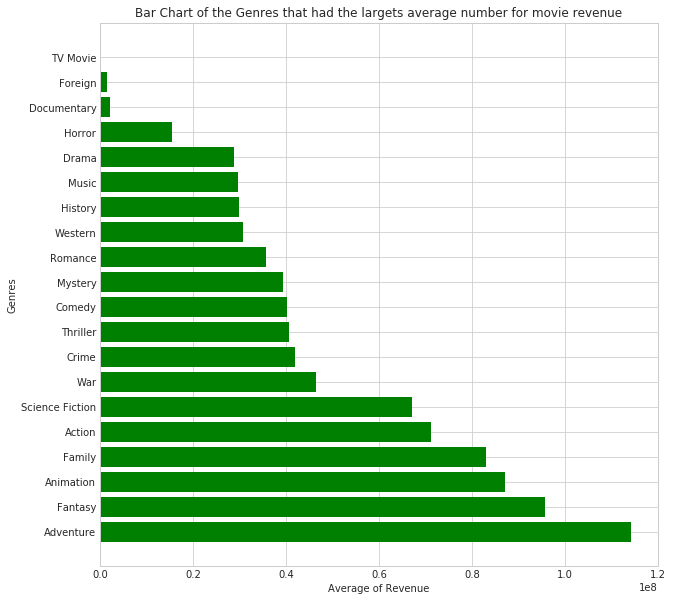

In [52]:
#plot ranking of director with average_movie_revenue
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))

plt.barh(range(len(df_genres_avg.genres)),df_genres_avg.revenue,color = 'green')
plt.yticks(range(len(df_genres_avg.genres)),df_genres_avg.genres)
plt.xlabel('Average of Revenue')
plt.ylabel('Genres')
plt.title('Bar Chart of the Genres that had the largets average number for movie revenue')
plt.show();

Totally, Adventures, Action and Comedy are top 3 genres with high total revenues. However, averagely Adventure, Fantasy and Animation are top 3 genres with average highest revenue. In a word, adventure is the top genre for the high revenue movies.
At the same time, Documentary, Foreign and TV movie are 3 least genres with movie revenue from both lists.

**Therefore we can make conclusion that: genres is a great factor impact movie's revenue. The top 1 genre for high movie revenue is Adventure, and the last one genre is TV movie.**

Next, we will make dataset transform for production_companies columns and explore which company is good at making high revenue movies.

In [53]:
# calculate length of splits
lens = df['production_companies'].str.split('|').map(len)

# create new dataframe df_genres, repeating or chaining as appropriate
df_production = pd.DataFrame({'production_company':chainer(df['production_companies']),
                 'revenue':np.repeat(df['revenue'],lens),
                        'original_title':np.repeat(df['original_title'],lens)})

In [54]:
# Check the head of df_production
df_production.head()

,production_company,revenue,original_title
0,Universal Studios,1513528810,Jurassic World
0,Amblin Entertainment,1513528810,Jurassic World
0,Legendary Pictures,1513528810,Jurassic World
0,Fuji Television Network,1513528810,Jurassic World
0,Dentsu,1513528810,Jurassic World


We can see for Jurassic World, all 5 production companies are split to individual rows, with each repeat same revenue from movie Jurassic World.

In [55]:
# Check which company have highest total revenue from movies.
df_production.groupby('production_company')['revenue'].sum().sort_values(ascending = False).head(10)

production_company
Warner Bros.                              57522511770
Universal Pictures                        52063952297
Walt Disney Pictures                      47361216654
Paramount Pictures                        42351765027
Twentieth Century Fox Film Corporation    39937775899
Columbia Pictures                         31021021001
DreamWorks Animation                      22482061431
New Line Cinema                           21099151529
DreamWorks SKG                            19253825138
Pixar Animation Studios                   16477374188
Name: revenue, dtype: int64

No surprise the highest revenue movies are from world leading production companies, which are Warner Bros., Universal Pictiures, Walt Disney Pictures, and etc. **So we can conclude that: totally, bigger movie productions have movies with majority high revenue.**

In [56]:
# Check which company have highest total revenue from movies.
df_production.groupby('production_company')['revenue'].mean().sort_values(ascending = False).head(10)

production_company
Truenorth Productions                2.068178e+09
Second Mate Productions              1.013330e+09
3Foot7                               9.551198e+08
Cool Music                           9.382127e+08
Harry Potter Publishing Rights       9.382127e+08
Patalex IV Productions Limited       8.959210e+08
B24                                  8.806746e+08
MIRACLE Productions GmbH & Co. KG    8.766885e+08
Disney Enterprises                   8.646260e+08
One Race Films                       8.233230e+08
Name: revenue, dtype: float64

**While we check the average move revenue from production companies, we can found these companies are not on the previous list. These are some companies more focus on Special Effects, Movie Backgrond Music, Art Effect or has series of famous IP rights.**

<a id='conclusions'></a>
## Conclusions and Limitation

>After we did exploratory analysis for major numerical variables and categroical variables, we can briefly make conclusions that:
 -  "budget" ,"popularity" and "vote_counts" are positivly correlated with movie "revenue". 
 -  Great director has positive relationship with movie revenue. Although top directors not always guarntee highest average movie reveue. The only director has both higher total movie revenue and higher average movie revenue is David Yates.
 - Cast has no obvious impact on movie revenue.
 - The top genre for movie revenue is adventure, and the botton genre for movie revenue is TV movie.

> Although we have a general idea what variabels are huge impact on the movie revenue, there are still a lot limitations with our exploratory analysis:
 - There are a lot missing values and the value with zero, which highly skewed the data. We could try to identify what might cause this and try to imporve data quality in the future.
 - Although we see some positive correlation between some numerical variables with movie revenue, there's a large group of outliers not following this trend. It's very meaningful to further investigate these outliers and try to get additional insights.
 - Some of the variabels are dropped in this study, such as release_date, the homepage and movie overview. We could further digging in future study to see if these variables have big impact on movie revenue.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0